# Exercise 1 - Oblate Central Body

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def dSdt(t, S):
    r, v_r, theta, v_theta, phi, v_phi = S
    dSdt = [v_r, r*((v_theta)**2)+r*((np.sin(theta))**2)*(v_phi**2)-(1/r)**2, v_theta,
            np.sin(theta)*np.cos(theta)*(v_phi**2)-2*(v_r/r)*v_theta, v_phi, 
            -2*(v_r/r)*v_phi-2*np.cos(theta)/np.sin(theta)*v_phi*v_theta]
    return dSdt

def plot():
    
    S_0 = (r_0, v_r0, theta_0, v_theta0,phi_0, v_phi0)
    
    t = np.linspace(0, 50, 1000) #sets the number of laps taken

    sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)
    
    r = sol.T[0]
    theta = sol.T[2]
    phi = sol.T[4]
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot (x,y,z)
    plt.show()

### Case 1

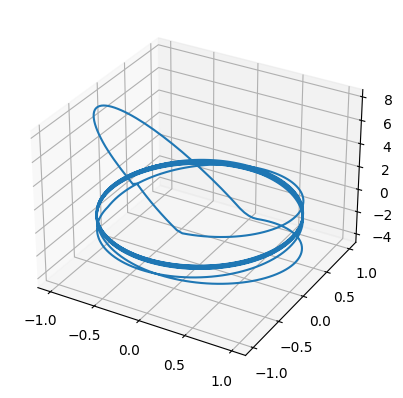

In [20]:
r_0 = 1
v_r0 = 0
theta_0 = np.pi/2
v_theta0 = 0
phi_0 = 0
v_phi0 = 1

plot()

### Case 2

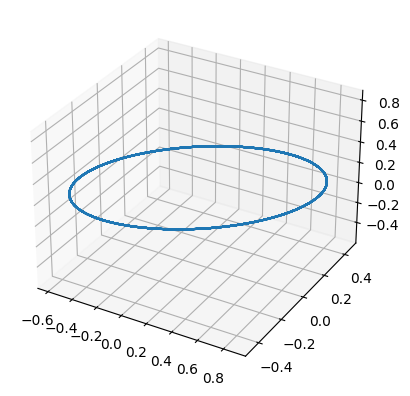

In [21]:
r_0 = 1
v_r0 = 0
theta_0 = np.pi/4
v_theta0 = np.sqrt(2)/2
phi_0 = 0
v_phi0 = np.sqrt(2)/2

plot()

### Case 3

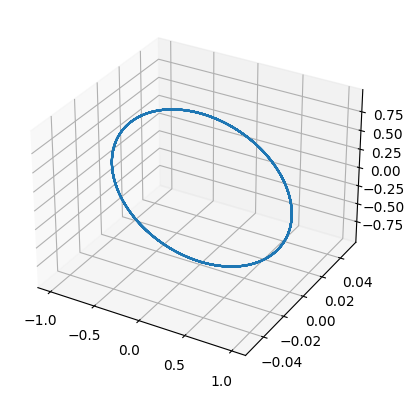

In [22]:
r_0 = 1
v_r0 = 0
theta_0 = 0.001
v_theta0 = 1
phi_0 = 0
v_phi0 = 0

plot()

# Exercise 2 - Hill’s Restricted Three-body Problem Orbits

In [6]:
omega = 1
mu = 0.01215
x1 = -mu
x2 = 1-mu

def dSdt(t, S):
    x, v_x, y, v_y, z, v_z = S
    dSdt = [v_x, 
            -(1-mu)*(x-x1)/((x+mu)**2+y**2+z**2)**(3/2)-mu*(x-x2)/((x+mu-1)**2+y**2+z**2)**(3/2)+2*v_y*omega+x*omega**2,
           v_y,
           -(1-mu)*y/((x+mu)**2+y**2+z**2)**(3/2)-mu*y/((x+mu-1)**2+y**2+z**2)**(3/2)-2*v_x*omega+y*omega**2,
           v_z,
           -(1-mu)*z/((x+mu)**2+y**2+z**2)**(3/2)-mu*z/((x+mu-1)**2+y**2+z**2)**(3/2)]
    return dSdt

def plot(t):
    x = sol.T[0]
    y = sol.T[2]
    z = sol.T[4]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot (x,y,z)
    plt.show()
    
def jacobi_int(i):
    return sol.T[1][i]**2+sol.T[3][i]**2+sol.T[5][i]**2-(sol.T[0][i]**2+sol.T[2][i]**2)*omega**2-2*(1-mu)/((sol.T[0][i]+mu)**2+sol.T[2][i]**2+sol.T[4][i]**2)**(3/2)-2*mu/((sol.T[0][i]+mu-1)**2+sol.T[2][i]**2+sol.T[4][i]**2)**(3/2)
    
t = np.linspace(0, 50, 1000) #sets the number of laps taken

### Ellipse

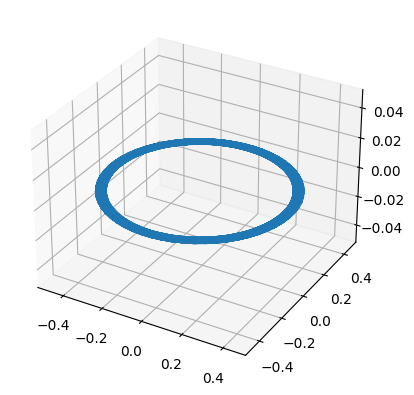

In [7]:
x0 = 0.4
v_x0 = 0
y0 = 0
v_y0 = -2
z0 = 0
v_z0 = 0
S_0 = [x0, v_x0, y0, v_y0, z0, v_z0]

sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

plot(t)

### Rosette 1

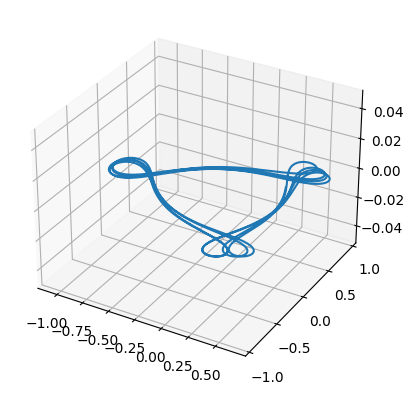

In [10]:
x0 = 0.5
v_x0 = 0
y0 = 0
v_y0 = 1.1
z0 = 0
v_z0 = 0
S_0 = [x0, v_x0, y0, v_y0, z0, v_z0]

sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

plot(t)

### Rosette 2

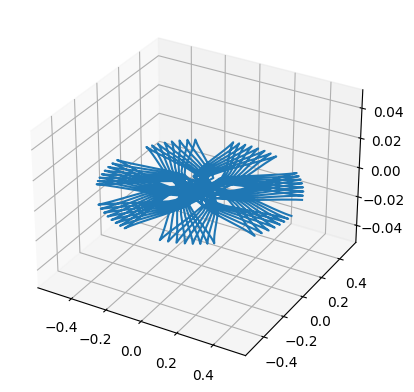

In [12]:
x0 = 0.5
v_x0 = 0
y0 = 0
v_y0 = 0
z0 = 0
v_z0 = 0
S_0 = [x0, v_x0, y0, v_y0, z0, v_z0]

sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

plot(t)

### Rosette 3

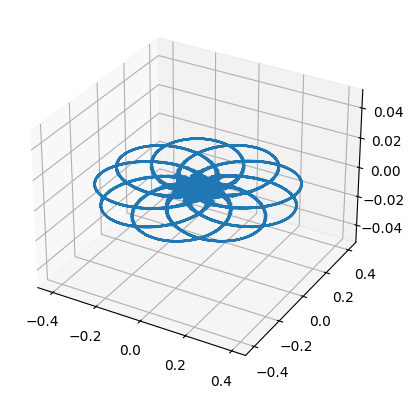

In [14]:
x0 = 0.4
v_x0 = 0
y0 = 0
v_y0 = -1.12
z0 = 0
v_z0 = 0
S_0 = [x0, v_x0, y0, v_y0, z0, v_z0]

sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

plot(t)

### Vertical

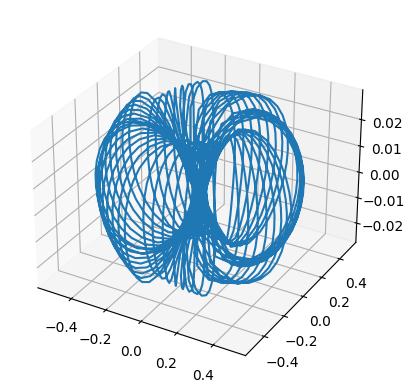

In [16]:
x0 = 0.5
v_x0 = 0
y0 = 0
v_y0 = 0
z0 = 0
v_z0 = 0.1
S_0 = [x0, v_x0, y0, v_y0, z0, v_z0]

sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

plot(t)